In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Missing values in each column:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Summary statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Column names:
Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

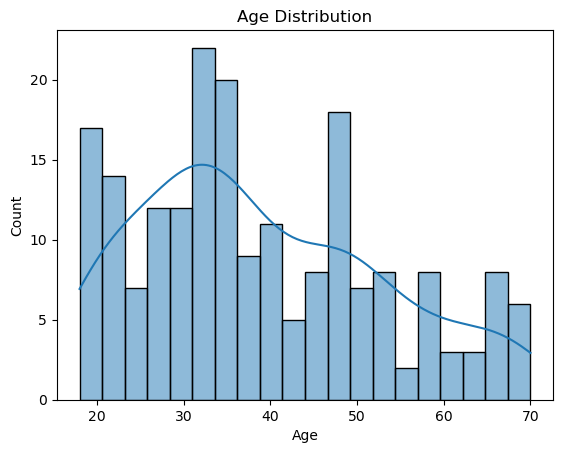

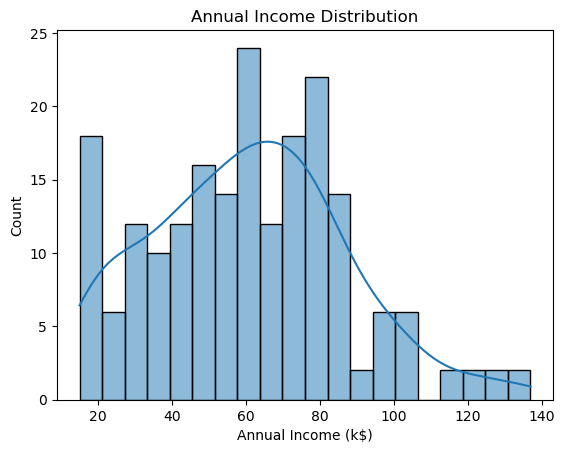

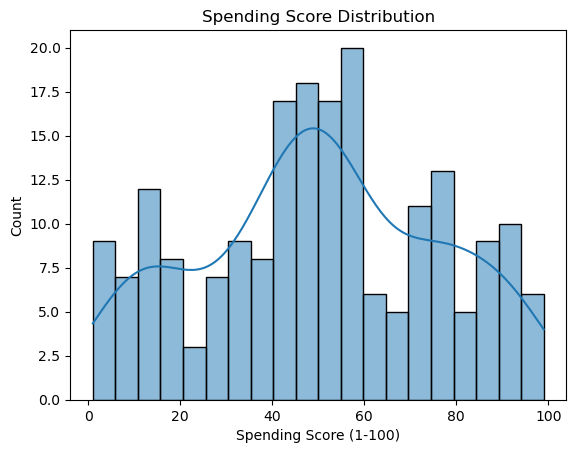

Column 'Gender' does not exist in the DataFrame. Available columns are: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [8]:


# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(data.describe())

# Check the column names to ensure they are correct
print("\nColumn names:")
print(data.columns)

# Strip any leading or trailing spaces from column names
data.columns = data.columns.str.strip()

# Visualize the distribution of numerical features
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(data['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.show()

sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.show()

# Visualize categorical features
# Use the correct column name for Gender
# Check if the column name is 'Gender' or 'gender' or something else
gender_column = 'Gender'  # Change this based on the actual column name

# Check if the column exists
if gender_column in data.columns:
    sns.countplot(x=gender_column, data=data)
    plt.title('Gender Distribution')
    plt.show()
else:
    print(f"Column '{gender_column}' does not exist in the DataFrame. Available columns are: {data.columns.tolist()}")

In [9]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

C:\Users\T H I N K P A D\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\T H I N K P A D\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\T H I N K P A D\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\T H I N K P A D\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a m

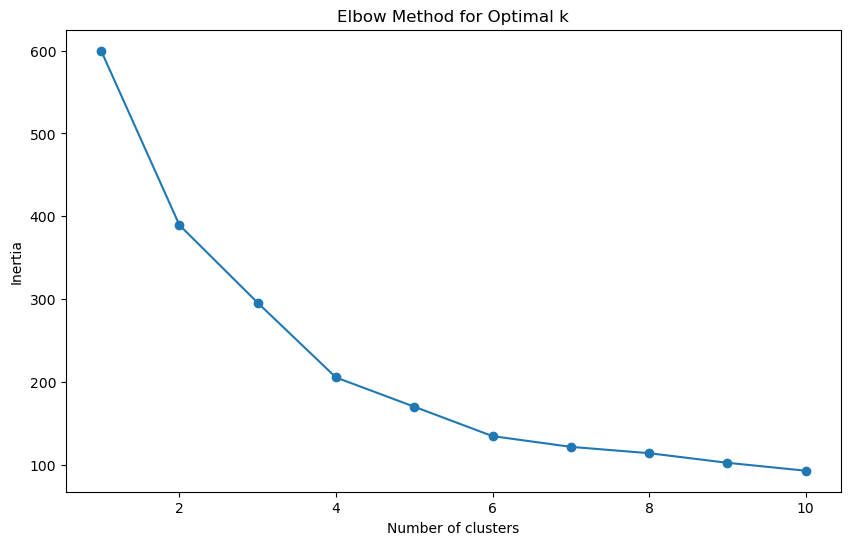

In [10]:
# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [11]:
# Fit K-Means with the chosen number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\T H I N K P A D\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


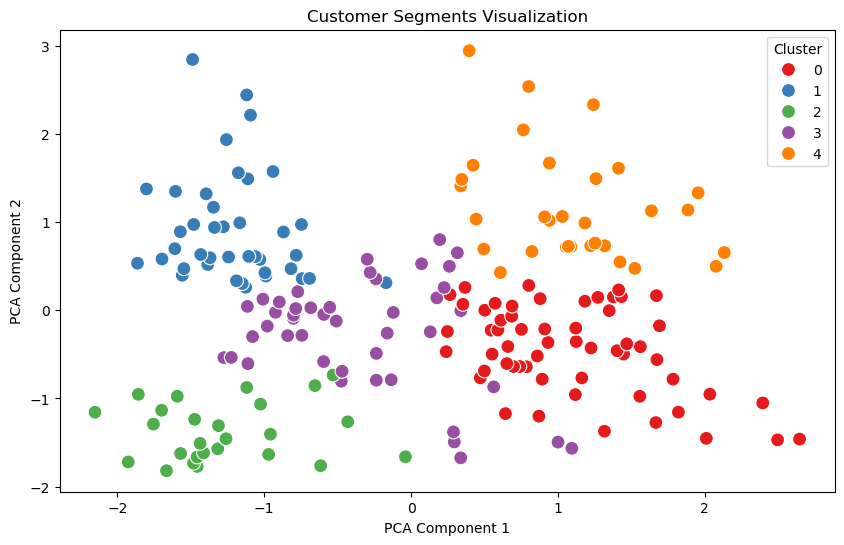

In [12]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set1', s=100)
plt.title('Customer Segments Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


Cluster summary (mean values):
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         68.775862  55.275862           47.620690               41.706897   
1        161.025000  32.875000           86.100000               81.525000   
2         23.461538  25.769231           26.115385               74.846154   
3         86.377778  26.733333           54.311111               40.911111   
4        166.870968  44.387097           89.774194               18.483871   

         Cluster  
Cluster           
0            0.0  
1            1.0  
2            2.0  
3            3.0  
4            4.0  


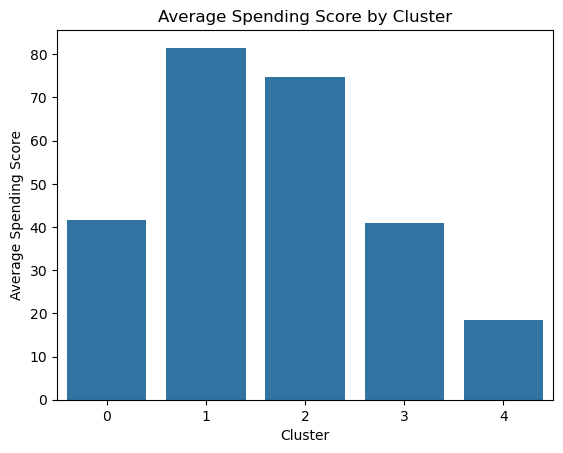

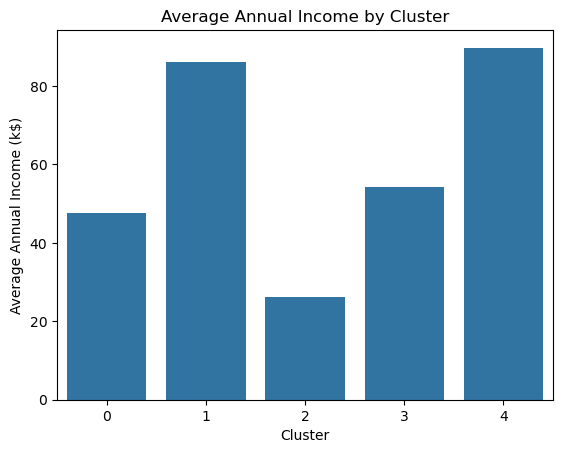

In [14]:


# Group by cluster and calculate mean values for numeric columns only
numeric_columns = data.select_dtypes(include=['number']).columns  # Select only numeric columns
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()  # Group by 'Cluster' and calculate mean
print("\nCluster summary (mean values):")
print(cluster_summary)

# Visualize the average spending score and income by cluster
sns.barplot(x=cluster_summary.index, y=cluster_summary['Spending Score (1-100)'])
plt.title('Average Spending Score by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending Score')
plt.show()

sns.barplot(x=cluster_summary.index, y=cluster_summary['Annual Income (k$)'])
plt.title('Average Annual Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Annual Income (k$)')
plt.show()

In [16]:
import pickle

# Save the model
with open('customer_segmentation_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

